# Project overview. 
There is entertainment application Procrastinate Pro+. Despite huge investments in advertising, company has been losing money for few months. Main task is to understand reasons and help company to goal positive ROI.

There is data about users from May 1 to October 27, 2019:
- server log with data on their visits,
- unloading of their purchases during this period,
- advertising costs.

To be learned:
- where users come from and what devices they use,
- how much does it cost to acquire users from various advertising channels;
- how much money does each usersbring in,
- when the cost of acquisition a users pays off,
- what factors block from users acquisition.

# Data description
We have three datasets. The file **visits_info_short.csv** stores server log with information about site visits, **orders_info_short.csv** — information about orders, and **costs_info_short.csv** — information about advertising costs.

Structure **visits_info_short.csv**:
- User Id — a unique user ID,
- Region — the user's country,
- Device — the user's device type,
- Channel — ID of the transition source,
- Session Start — date and time of the session start,
- Session End — date and time of the end of the session.

Structure **orders_info_short.csv**:
- User Id — a unique user ID,
- Event Dt — date and time of purchase,
- Revenue — the amount of the order.

Structure **costs_info_short.csv**:
- dt — date of the advertising campaign,
- Channel — the identifier of the advertising source,
- costs — costs for this campaign.

**Project navigation:**

[1. Loading the data from CSV files into dataframes using libraries.](#1.-Loading-the-data-from-CSV-files-into-dataframes-using-libraries)

   - [1.1 Data preprocessing](#1.1-Data-preprocessing)
   
   - [1.2 Making column headings to lower and "snake" case](#1.2-Making-column-headings-to-lower-and-"snake"-case)
   
   - [1.3 Making names in lines to lower case, some names in the lines lead to "snake" case](#1.3-Making-names-in-lines-to-lower-case,-some-names-in-the-lines-lead-to-"snake"-case)
   
   - [1.4 Checking data for explicit and implicit duplicates](#1.4-Checking-data-for-explicit-and-implicit-duplicates)

[2. Defining functions for calculating and analyzing LTV, ROI, retention and conversion.](#2.-Defining-functions-for-calculating-and-analyzing-LTV,-ROI,-retention-and-conversion.)

   - [2.1 Making function for user profiles-get_profiles()](#2.1-Making-function-for-user-profiles-get_profiles())
   
   - [2.2 Making function to calculate retention-get_retention()](#2.2-Making-function-to-calculate-retention-get_retention())
   
   - [2.3 Making function to calculate conversion-get_conversion()](#2.3-Making-function-to-calculate-conversion-get_conversion())
   
   - [2.4 Making function to calculate LTV и ROI-get_ltv()](#2.4-Making-function-to-calculate-LTV-и-ROI-get_ltv())
   
   - [2.5 Making function to calculate mmoving average-filter_data()](#2.5-Making-function-to-calculate-mmoving-average-filter_data())
   
   - [2.6 Making function to plot retention-plot_retention()](#2.6-Making-function-to-plot-retention-plot_retention())
   
   - [2.7 Making function to plot conversion-plot_conversion()](#2.7-Making-function-to-plot-conversion-plot_conversion())
   
   - [2.8 Making function to plot LTV и ROI-plot_ltv_roi()](#2.8-Making-function-to-plot-LTV-и-ROI-plot_ltv_roi())

[3. Exploratory data analysis](#3.-Exploratory-data-analysis)

   - [3.1 create user profiles. determine minimum and maximum dates for users acquisition.](#3.1-create-user-profiles.-determine-minimum-and-maximum-dates-for-users-acquisition.)
   
   - [3.2 find out what countries users come to app from and which country accounts are most payable.](#3.2-find-out-what-countries-users-come-to-app-from-and-which-country-accounts-are-most-payable.)
   
   - [3.3 find out which devices are used by users and which devices are preferred by payable users.](#3.3-find-out-which-devices-are-used-by-users-and-which-devices-are-preferred-by-payable-users.)
   
   - [3.4 learned advertising sources of acquisition and determine channels with most payable users.](#3.4-learned-advertising-sources-of-acquisition-and-determine-channels-with-most-payable-users.)

[4. Marketing](#4.-Marketing)

   - [4.1 calculate total amount of marketing costs.](#4.1-calculate-total-amount-of-marketing-costs.)
   
   - [4.2 find out how costs are distributed among ads sources, how much money was spent per source.](#4.2-find-out-how-costs-are-distributed-among-ads-sources,-how-much-money-was-spent-per-source.)
   
   - [4.3 plot costs dynamic for each source by week.](#4.3-plot-costs-dynamic-for-each-source-by-week.)
   
   - [4.4 find out how much does it cost in average to acquire one user (CAC) from each source.](#4.4-find-out-how-much-does-it-cost-in-average-to-acquire-one-user-(CAC)-from-each-source.)

[5. ROI](#5.-ROI)

   - [5.1 analyze ROI using LTV and ROI graphs, as well as graphs of LTV, CAC and ROI dynamics.](#5.1-analyze-ROI-using-LTV-and-ROI-graphs,-as-well-as-graphs-of-LTV,-CAC-and-ROI-dynamics.)
   
   - [5.2 check user conversion/retention rate and their dynamics.](#5.2-check-user-conversion/retention-rate-and-their-dynamics.)
   
   - [5.3 analyze ROI by device.](#5.3-analyze-ROI-by-device.)
   
   - [5.4 analyze ROI by country.](#5.4-analyze-ROI-by-country.)
   
   - [5.5 analyze ROI by channels.](#5.5-analyze-ROI-by-channels.)

[Main summary](#Main-summary)


## 1. Loading the data from CSV files into dataframes using libraries.

In [1]:
import pandas as pd
import numpy as np
from datetime import datetime, timedelta
from matplotlib import pyplot as plt

In [2]:
# upload data and convert data type to dates
try:
    visits, orders, costs = (
    pd.read_csv('visits_info_short.csv', parse_dates=['Session Start', 'Session End']),  # visits
    pd.read_csv('orders_info_short.csv', parse_dates=['Event Dt']),  # orders
    pd.read_csv('costs_info_short.csv', parse_dates=['dt']))  # expenses
    costs['dt'] = pd.to_datetime(costs['dt']).dt.date
except:
    visits, orders, costs = (
    pd.read_csv('https://code.s3.yandex.net/datasets/visits_info_short.csv', parse_dates=['Session Start', 'Session End']),  # visits
    pd.read_csv('https://code.s3.yandex.net/datasets/orders_info_short.csv',parse_dates=['Event Dt']),  # orders
    pd.read_csv('https://code.s3.yandex.net/datasets/costs_info_short.csv', parse_dates=['dt']))  # expenses
    costs['dt'] = pd.to_datetime(costs['dt']).dt.date

Пропишем функцию для просмотра общей информации датасетов и далее посмотрим на сами данные

In [3]:
#  writing a function to display general information
def display_info(df, name):
    print(f"DataFrame: {name}")
    print("Head:")
    print(df.head())
    print("\nInfo:")
    print(df.info())
    print("-" * 50)

# calling the function for each dataframe
display_info(visits, "Users")
display_info(orders, "Rides")
display_info(costs, "Subscriptions")

DataFrame: Users
Head:
        User Id         Region   Device  Channel       Session Start  \
0  981449118918  United States   iPhone  organic 2019-05-01 02:36:01   
1  278965908054  United States   iPhone  organic 2019-05-01 04:46:31   
2  590706206550  United States      Mac  organic 2019-05-01 14:09:25   
3  326433527971  United States  Android   TipTop 2019-05-01 00:29:59   
4  349773784594  United States      Mac  organic 2019-05-01 03:33:35   

          Session End  
0 2019-05-01 02:45:01  
1 2019-05-01 04:47:35  
2 2019-05-01 15:32:08  
3 2019-05-01 00:54:25  
4 2019-05-01 03:57:40  

Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309901 entries, 0 to 309900
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   User Id        309901 non-null  int64         
 1   Region         309901 non-null  object        
 2   Device         309901 non-null  object        
 3   Channel        309

Quick look at data showed that it is necessary:
* making column headings to the lower and "snake" case;
* making names in lines to lower case, some names in the lines lead to "snake" case;
* changing date format from object to datetime64;
* checking data for explicit and implicit duplicates;
* checking for missing values (although the general information on datasets shows that total number of rows matches total number of rows without missing values).

### 1.1 Data preprocessing

In [4]:
pd.DataFrame(round(visits.isna().mean()*100,1)).style.background_gradient('coolwarm')

,0
User Id,0.000000
Region,0.000000
Device,0.000000
Channel,0.000000
Session Start,0.000000
Session End,0.000000


In [5]:
pd.DataFrame(round(orders.isna().mean()*100,1)).style.background_gradient('coolwarm')

,0
User Id,0.000000
Event Dt,0.000000
Revenue,0.000000


In [6]:
pd.DataFrame(round(costs.isna().mean()*100,1)).style.background_gradient('coolwarm')

,0
dt,0.000000
Channel,0.000000
costs,0.000000


No missing values are in dataframes.

### 1.2 making column headings to lower and "snake" case

In [7]:
# using list comprehension and loop to make column heading to lower case
visits.columns = [i.lower().replace(' ', '_') for i in visits.columns]
orders.columns = [i.lower().replace(' ', '_') for i in orders.columns]
costs.columns = [i.lower().replace(' ', '_') for i in costs.columns]

In [8]:
# checking column names after change
display(visits.columns)
display(orders.columns)
display(costs.columns)

Index(['user_id', 'region', 'device', 'channel', 'session_start',
       'session_end'],
      dtype='object')

Index(['user_id', 'event_dt', 'revenue'], dtype='object')

Index(['dt', 'channel', 'costs'], dtype='object')

### 1.3 making names in lines to lower case, some names in the lines lead to "snake" case

In [9]:
# using list comprehension 
visits.region = [i.lower().replace(' ', '_') for i in visits.region]
visits.device = [i.lower().replace(' ', '_') for i in visits.device]
visits.channel = [i.lower().replace(' ', '_') for i in visits.channel]
costs.channel = [i.lower().replace(' ', '_') for i in costs.channel]

In [10]:
# checking dataframes again
display(visits.head(3))
display(orders.head(3))
display(costs.head(3))

,user_id,region,device,channel,session_start,session_end
0,981449118918,united_states,iphone,organic,2019-05-01 02:36:01,2019-05-01 02:45:01
1,278965908054,united_states,iphone,organic,2019-05-01 04:46:31,2019-05-01 04:47:35
2,590706206550,united_states,mac,organic,2019-05-01 14:09:25,2019-05-01 15:32:08


,user_id,event_dt,revenue
0,188246423999,2019-05-01 23:09:52,4.99
1,174361394180,2019-05-01 12:24:04,4.99
2,529610067795,2019-05-01 11:34:04,4.99


,dt,channel,costs
0,2019-05-01,faceboom,113.3
1,2019-05-02,faceboom,78.1
2,2019-05-03,faceboom,85.8


### 1.4 checking data for explicit and implicit duplicates

In [11]:
# explicit duplicates
display(visits.duplicated().sum())
display(orders.duplicated().sum())
display(costs.duplicated().sum())

0

0

0

In [12]:
# implicit duplicates (text format)
display(visits.region.unique())
display(visits.device.unique())
display(visits.channel.unique())
display(costs.channel.unique())

array(['united_states', 'uk', 'france', 'germany'], dtype=object)

array(['iphone', 'mac', 'android', 'pc'], dtype=object)

array(['organic', 'tiptop', 'rocketsuperads', 'yrabbit', 'faceboom',
       'mediatornado', 'adnonsense', 'leapbob', 'wahoonetbanner',
       'opplecreativemedia', 'lambdamediaads'], dtype=object)

array(['faceboom', 'mediatornado', 'rocketsuperads', 'tiptop', 'yrabbit',
       'adnonsense', 'leapbob', 'opplecreativemedia', 'wahoonetbanner',
       'lambdamediaads'], dtype=object)

No explicit and implicit duplicates

Also checking if there are values with minus in columns **costs** и **revenue**.

0

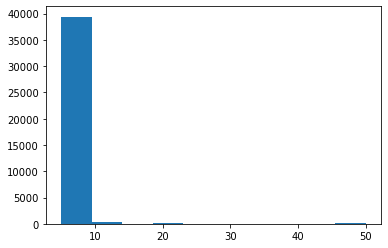

In [13]:
display(len(orders[orders.revenue < 0]))
orders.revenue.hist(grid=False)
plt.show()

No value less than zero was found. Most values are concentrated to 10, there are several outliers in interval from 20 to 50 - this may happen.

0

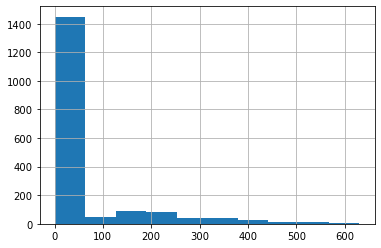

In [14]:
display(len(costs[costs.costs < 0]))
costs.costs.hist()
plt.show()

No value less than zero was found. Most values are concentrated to 100.

**Section summary:**
* making column headings to the lower and "snake" case;
* making names in lines to lower case, some names in the lines lead to "snake" case;
* changing date format from object to datetime64;
* checking data for explicit and implicit duplicates;
* checking for missing values (although the general information on datasets shows that total number of rows matches total number of rows without missing values).
* checked anomalies in numeric columns.

## 2. Defining functions for calculating and analyzing LTV, ROI, retention and conversion.

Functions for calculating metric values:

- `get_profiles()` — to create user profiles,
- `get_retention()` — to calculate Retention Rate,
- `get_conversion()` — to calculate conversion,
- `get_ltv()` — for calculating LTV.

Functions for plotting:

- `filter_data()` — for smoothing data,
- `plot_retention()` — for plotting Retention Rate,
- `plot_conversion()` — for plotting conversion,
- `plot_ltv_roi` — for LTV and ROI visualization.

### 2.1 Making function for user profiles-get_profiles()

In [15]:
def get_profiles(sessions, orders, events, ad_costs, event_names=[]):

    # finding first visits
    profiles = (
        sessions.sort_values(by=['user_id', 'session_start'])
        .groupby('user_id')
        .agg(
            {
                'session_start': 'first',
                'channel': 'first',
                'device': 'first',
                'region': 'first',
            }
        )
        .rename(columns={'session_start': 'first_ts'})
        .reset_index()
    )

    # identify first visit date for cohort analysis
    # and 1st day of month when first visit happend
    profiles['dt'] = profiles['first_ts'].dt.date
    profiles['month'] = profiles['first_ts'].astype('datetime64[M]')

    # add metric - payer
    profiles['payer'] = profiles['user_id'].isin(orders['user_id'].unique())

    # add flags for all events from event_names
    for event in event_names:
        if event in events['event_name'].unique():
            profiles[event] = profiles['user_id'].isin(
                events.query('event_name == @event')['user_id'].unique()
            )

    # calculate qty of unique users
    # with identical channel and date
    new_users = (
        profiles.groupby(['dt', 'channel'])
        .agg({'user_id': 'nunique'})
        .rename(columns={'user_id': 'unique_users'})
        .reset_index()
    )

    # merging costs and qty users
    ad_costs = ad_costs.merge(new_users, on=['dt', 'channel'], how='left')

    # dividing costs by qty of acquisition users
    ad_costs['acquisition_cost'] = ad_costs['costs'] / ad_costs['unique_users']

    # add cost of acquisition new users
    profiles = profiles.merge(
        ad_costs[['dt', 'channel', 'acquisition_cost']],
        on=['dt', 'channel'],
        how='left',
    )

    # cost of acquisition organic users is equal 0
    profiles['acquisition_cost'] = profiles['acquisition_cost'].fillna(0)

    return profiles

### 2.2 Making function to calculate retention-get_retention()

In [16]:
# function to calculate retention

def get_retention(
    profiles,
    sessions,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # add column payer dimensions list
    dimensions = ['payer'] + dimensions

    # exclude users who have not "lived up" to the analysis horizon
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')

    # collecting raw data to calculate retantion
    result_raw = result_raw.merge(
        sessions[['user_id', 'session_start']], on='user_id', how='left'
    )
    result_raw['lifetime'] = (
        result_raw['session_start'] - result_raw['first_ts']
    ).dt.days

    # function for grouping table by desired metrics
    def group_by_dimensions(df, dims, horizon_days):
        result = df.pivot_table(
            index=dims, columns='lifetime', values='user_id', aggfunc='nunique'
        )
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        result = result.div(result['cohort_size'], axis=0)
        result = result[['cohort_size'] + list(range(horizon_days))]
        result['cohort_size'] = cohort_sizes
        return result

    # here is table with retention 
    result_grouped = group_by_dimensions(result_raw, dimensions, horizon_days)

    # here is table with dynamic retention 
    result_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    # return both tables and raw data
    return result_raw, result_grouped, result_in_time 

### 2.3 Making function to calculate conversion-get_conversion()

In [17]:
# function for conversion calculation

def get_conversion(
    profiles,
    purchases,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # exclude users who have not "lived up" to the analysis horizon
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')

    # identify date and time of 1st order for each user
    first_purchases = (
        purchases.sort_values(by=['user_id', 'event_dt'])
        .groupby('user_id')
        .agg({'event_dt': 'first'})
        .reset_index()
    )

    # adding order data to user profiles
    result_raw = result_raw.merge(
        first_purchases[['user_id', 'event_dt']], on='user_id', how='left'
    )

    # calculating lifetime for each order
    result_raw['lifetime'] = (
        result_raw['event_dt'] - result_raw['first_ts']
    ).dt.days

    # grouping by cohort, if dimensions has no data
    if len(dimensions) == 0:
        result_raw['cohort'] = 'All users' 
        dimensions = dimensions + ['cohort']

    # function for grouping by desired metrics
    def group_by_dimensions(df, dims, horizon_days):
        result = df.pivot_table(
            index=dims, columns='lifetime', values='user_id', aggfunc='nunique'
        )
        result = result.fillna(0).cumsum(axis = 1)
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        # deviding each cell in row by cohort size
        # calculating conversion rate
        result = result.div(result['cohort_size'], axis=0)
        result = result[['cohort_size'] + list(range(horizon_days))]
        result['cohort_size'] = cohort_sizes
        return result

    # here is conversion dataframe
    result_grouped = group_by_dimensions(result_raw, dimensions, horizon_days)

    # remove 'cohort' from dimensions to calculate dynamic of conversion
    if 'cohort' in dimensions: 
        dimensions = []

    # here is dynamic of conversion
    result_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    # return both tables and raw data
    return result_raw, result_grouped, result_in_time

### 2.4 Making function to calculate LTV и ROI-get_ltv()

In [18]:
# function for LTV и ROI calculation

def get_ltv(
    profiles,
    purchases,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # exclude users who have not "lived up" to the analysis horizon
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')
    # adding order data to user profiles
    result_raw = result_raw.merge(
        purchases[['user_id', 'event_dt', 'revenue']], on='user_id', how='left'
    )
    # calculating lifetime for each order
    result_raw['lifetime'] = (
        result_raw['event_dt'] - result_raw['first_ts']
    ).dt.days
    # grouping by cohort if dimensions doesnt have data in row
    if len(dimensions) == 0:
        result_raw['cohort'] = 'All users'
        dimensions = dimensions + ['cohort']

    # grouping by cohort, if dimensions has no data
    def group_by_dimensions(df, dims, horizon_days):
        # building 'triangular' dataframe of revenue
        result = df.pivot_table(
            index=dims, columns='lifetime', values='revenue', aggfunc='sum'
        )
        # calculating cumulative sum of revenue
        result = result.fillna(0).cumsum(axis=1)
        # calculating cohort size
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        # merging cohort size and revenue dataframes
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        # calculating LTV: dividing each cell in row by cohort size
        result = result.div(result['cohort_size'], axis=0)
        # exclude lifetimes which over analysis horizon
        result = result[['cohort_size'] + list(range(horizon_days))]
        # restore cohort sizes
        result['cohort_size'] = cohort_sizes

        # collecting users data and CAC values to merged dataframe 
        # adding metrics from dimensions
        cac = df[['user_id', 'acquisition_cost'] + dims].drop_duplicates()

        # calculating average CAC by dimension metrics
        cac = (
            cac.groupby(dims)
            .agg({'acquisition_cost': 'mean'})
            .rename(columns={'acquisition_cost': 'cac'})
        )

        # calculating ROI: deviding LTV by CAC
        roi = result.div(cac['cac'], axis=0)

        # removing rows with infinite ROI
        roi = roi[~roi['cohort_size'].isin([np.inf])]

        # restore cohort size in ROI dataframe
        roi['cohort_size'] = cohort_sizes

        # adding CAC to ROI dataframe
        roi['cac'] = cac['cac']

        # forming dataframe where only cohort size, CAC
        # and ROI within liftimes, not exceeding analysis horizon
        roi = roi[['cohort_size', 'cac'] + list(range(horizon_days))]

        # return LTV and ROI dataframe
        return result, roi

    # here is LTV и ROI dataframe
    result_grouped, roi_grouped = group_by_dimensions(
        result_raw, dimensions, horizon_days
    )

    # removing 'cohort' from dimensions for dynamic dataframes
    if 'cohort' in dimensions:
        dimensions = []

    # hare are dynamic динамики LTV и ROI
    result_in_time, roi_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    return (
        result_raw,  # raw data
        result_grouped,  # LTV dataframe
        result_in_time,  # LTV dynamic dataframe
        roi_grouped,  # ROI dataframe
        roi_in_time,  # ROI dynamic dataframe
    )

### 2.5 Making function to calculate mmoving average-filter_data()

In [19]:
# function for moving average

def filter_data(df, window):
    # applying moving average for each column
    for column in df.columns.values:
        df[column] = df[column].rolling(window).mean() 
    return df

### 2.6 Making function to plot retention-plot_retention()

In [20]:
# function to plot retention

def plot_retention(retention, retention_history, horizon, window=7):

    # size of plot backgound
    plt.figure(figsize=(15, 10))

    # skip cohort size and retention for 1st day
    retention = retention.drop(columns=['cohort_size', 0])
    # saving desired lifetime in dynamic dataframe
    retention_history = retention_history.drop(columns=['cohort_size'])[
        [horizon - 1]
    ]

    # if indexes of dataframe have only payer,
    # adding 2nd metric — cohort
    if retention.index.nlevels == 1:
        retention['cohort'] = 'All users'
        retention = retention.reset_index().set_index(['cohort', 'payer'])

    # in dataframe of plots  — 2 columns and 2 rows, 4 cells
    # 1st plot has curves of retention for payers 
    ax1 = plt.subplot(2, 2, 1)
    retention.query('payer == True').droplevel('payer').T.plot(
        grid=True, ax=ax1
    )
    plt.legend()
    plt.xlabel('Lifetime')
    plt.title('Retention of payers')

    # 2nd plot shows curves of retention for non-payers
    # vertical axis — from 1st plot
    ax2 = plt.subplot(2, 2, 2, sharey=ax1)
    retention.query('payer == False').droplevel('payer').T.plot(
        grid=True, ax=ax2
    )
    plt.legend()
    plt.xlabel('Lifetime')
    plt.title('Retention of non-payers')

    # 3rd plot — retention dynamic for payers
    ax3 = plt.subplot(2, 2, 3)
    # building columns name for pivot table
    columns = [
        name
        for name in retention_history.index.names
        if name not in ['dt', 'payer']
    ]
    # filtering data and build plot
    filtered_data = retention_history.query('payer == True').pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax3)
    plt.xlabel('Date of acquisition')
    plt.title(
        'Dynamic of retention for payers at {} day'.format(
            horizon
        )
    )

    # 4th plot — retention dynamic of non-payers
    ax4 = plt.subplot(2, 2, 4, sharey=ax3)
    # filtering data and build plot
    filtered_data = retention_history.query('payer == False').pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax4)
    plt.xlabel('Date of acquisition')
    plt.title(
        'Dynamic of retention for non-payers at {} day'.format(
            horizon
        )
    )
    
    plt.tight_layout()
    plt.show()

### 2.7 Making function to plot conversion-plot_conversion()

In [21]:
# function to plot conversion

def plot_conversion(conversion, conversion_history, horizon, window=7):

    # size of plot backgound
    plt.figure(figsize=(15, 5))

    # skip cohort size
    conversion = conversion.drop(columns=['cohort_size'])
    # saving desired lifetime in dynamic dataframe
    conversion_history = conversion_history.drop(columns=['cohort_size'])[
        [horizon - 1]
    ]

    # 1st plot — conversion curves
    ax1 = plt.subplot(1, 2, 1)
    conversion.T.plot(grid=True, ax=ax1)
    plt.legend()
    plt.xlabel('Lifetime')
    plt.title('User conversion')

    # 2nd plot — conversion dynamic
    ax2 = plt.subplot(1, 2, 2, sharey=ax1)
    columns = [
        # columns of columns indexes, exc.date, convert to columns of pivot table convert
        name for name in conversion_history.index.names if name not in ['dt']
    ]
    filtered_data = conversion_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax2)
    plt.xlabel('Date of acquisition')
    plt.title('Dynamic of conversion for users at {} day'.format(horizon))

    plt.tight_layout()
    plt.show()

### 2.8 Making function to plot LTV и ROI-plot_ltv_roi()

In [22]:
# function to plot LTV и ROI

def plot_ltv_roi(ltv, ltv_history, roi, roi_history, horizon, window=7):

    # size of plot backgound
    plt.figure(figsize=(20, 10))

    # skip cohort size
    ltv = ltv.drop(columns=['cohort_size'])
    # saving desired lifetime in dynamic dataframe
    ltv_history = ltv_history.drop(columns=['cohort_size'])[[horizon - 1]]

    # costs of user acquisition apply to new dataframe
    cac_history = roi_history[['cac']]

    # skip cohort size and cac from roi dataframe
    roi = roi.drop(columns=['cohort_size', 'cac'])
    # saving desired lifetime in dynamic dataframe
    roi_history = roi_history.drop(columns=['cohort_size', 'cac'])[
        [horizon - 1]
    ]

    # 1st plot — ltv curves
    ax1 = plt.subplot(2, 3, 1)
    ltv.T.plot(grid=True, ax=ax1)
    plt.legend()
    plt.xlabel('Lifetime')
    plt.title('LTV')

    # 2nd plot — ltv dynamic
    ax2 = plt.subplot(2, 3, 2, sharey=ax1)
    # columns of columns indexes, exc.date, convert to columns of pivot table convert
    columns = [name for name in ltv_history.index.names if name not in ['dt']]
    filtered_data = ltv_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax2)
    plt.xlabel('Date of acquisition')
    plt.title('Dynamic of LTV at {} day'.format(horizon))

    # 3rd plot — cac dynamic
    ax3 = plt.subplot(2, 3, 3, sharey=ax1)
    # columns of columns indexes, exc.date, convert to columns of pivot table convert
    columns = [name for name in cac_history.index.names if name not in ['dt']]
    filtered_data = cac_history.pivot_table(
        index='dt', columns=columns, values='cac', aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax3)
    plt.xlabel('Date of acquisition')
    plt.title('Dynamic of acquisition costs ')

    # 4th plot —  roi curves
    ax4 = plt.subplot(2, 3, 4)
    roi.T.plot(grid=True, ax=ax4)
    plt.axhline(y=1, color='red', linestyle='--', label='Break even point')
    plt.legend()
    plt.xlabel('Lifetime')
    plt.title('ROI')

    # 5th plot —  roi dynamic
    ax5 = plt.subplot(2, 3, 5, sharey=ax4)
    # columns of columns indexes, exc.date, convert to columns of pivot table convert
    columns = [name for name in roi_history.index.names if name not in ['dt']]
    filtered_data = roi_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax5)
    plt.axhline(y=1, color='red', linestyle='--', label='Break even point')
    plt.xlabel('Lifetime')
    plt.title('Dynamic of ROI for users at {} day'.format(horizon))

    plt.tight_layout()
    plt.show()

## 3. Exploratory data analysis

- create user profiles. determine minimum and maximum dates for users acquisition.
- find out what countries users come to app from and which country accounts are most payable.build table sto show number of users and share of payable users from each country.
- find out which devices are used by users and which devices are preferred by payable users.builde table to show number of users and share of payable users for each device.
- learned advertising sources of acquisition and determine channels with most payable users. build table to reflect number of users and share of payers for each acquisition channel.

### 3.1 create user profiles. determine minimum and maximum dates for users acquisition.

In [23]:
events=[]
profiles = get_profiles(visits, orders, events, costs)
profiles.head(5)

,user_id,first_ts,channel,device,region,dt,month,payer,acquisition_cost
0,599326,2019-05-07 20:58:57,faceboom,mac,united_states,2019-05-07,2019-05-01,True,1.088172
1,4919697,2019-07-09 12:46:07,faceboom,iphone,united_states,2019-07-09,2019-07-01,False,1.107237
2,6085896,2019-10-01 09:58:33,organic,iphone,france,2019-10-01,2019-10-01,False,0.000000
3,22593348,2019-08-22 21:35:48,adnonsense,pc,germany,2019-08-22,2019-08-01,False,0.988235
4,31989216,2019-10-02 00:07:44,yrabbit,iphone,united_states,2019-10-02,2019-10-01,False,0.230769


In [24]:
display(profiles.first_ts.min())
display(profiles.first_ts.max())

Timestamp('2019-05-01 00:00:41')

Timestamp('2019-10-27 23:59:04')

Dates aligne with start and end dates within observation period - 2019, from 1st of May till 27th of October.

### 3.2 find out what countries users come to app from and which country accounts are most payable.

In [25]:
profiles_regions = (profiles
                .groupby('region').agg({'user_id':'count', 'payer':['mean', 'sum']}))
profiles_regions

user_id     payer      
                count      mean   sum
region                               
france          17450  0.037994   663
germany         14981  0.041119   616
uk              17575  0.039829   700
united_states  100002  0.069019  6902

Convert dataframe to legible format - change doubled columns names to normal one, convert share of payers to %.

In [26]:
profiles_regions.columns=['users_qty', 'payer_share','payers_qty']
profiles_regions.payer_share = profiles_regions.payer_share.apply(lambda x: format(x,'.2%'))
# show what country has main share of payers
profiles_regions.sort_values(by='payers_qty', ascending = False)

,users_qty,payer_share,payers_qty
region,,,
united_states,100002,6.90%,6902
uk,17575,3.98%,700
france,17450,3.80%,663
germany,14981,4.11%,616


Leader in payers is USA - here are 6902 users. Least share of payers in % is in France. But if we look at absolute values, least qty of payers in Germany - 616.

### 3.3 find out which devices are used by users and which devices are preferred by payable users.

In [27]:
profiles_devices = (profiles
                .groupby('device').agg({'user_id':'count', 'payer':['mean', 'sum']}))
profiles_devices

user_id     payer      
          count      mean   sum
device                         
android   35032  0.058518  2050
iphone    54479  0.062079  3382
mac       30042  0.063644  1912
pc        30455  0.050468  1537

Convert dataframe to legible format - change doubled columns names to normal one, convert share of payers to %.

In [28]:
profiles_devices.columns=['users_qty', 'payer_share','payers_qty']
profiles_devices.payer_share = profiles_devices.payer_share.apply(lambda x: format(x,'.2%'))
# show what device has main share of payers
profiles_devices.sort_values(by='payers_qty', ascending = False)

,users_qty,payer_share,payers_qty
device,,,
iphone,54479,6.21%,3382
android,35032,5.85%,2050
mac,30042,6.36%,1912
pc,30455,5.05%,1537


Most popular device is `iphone` - here are 54479 users, payers prefer `iphone` as well - 3382 users. Biggest share of payers amoung `mac` users - 6.36%, least popular amoung payers -  `pc` - 5.05%.

### 3.4 learned advertising sources of acquisition and determine channels with most payable users.

In [29]:
profiles_channels = (profiles
                .groupby('channel').agg({'user_id':'count', 'payer':['mean', 'sum']}))
profiles_channels

user_id     payer      
                     count      mean   sum
channel                                   
adnonsense            3880  0.113402   440
faceboom             29144  0.122049  3557
lambdamediaads        2149  0.104700   225
leapbob               8553  0.030633   262
mediatornado          4364  0.035747   156
opplecreativemedia    8605  0.027077   233
organic              56439  0.020553  1160
rocketsuperads        4448  0.079137   352
tiptop               19561  0.096007  1878
wahoonetbanner        8553  0.052964   453
yrabbit               4312  0.038265   165

In [30]:
profiles_channels.columns=['users_qty', 'payer_share','payers_qty']
profiles_channels.payer_share = profiles_channels.payer_share.apply(lambda x: format(x,'.2%'))
# show what channel has main share of payers
profiles_channels.sort_values(by='payers_qty', ascending = False)

,users_qty,payer_share,payers_qty
channel,,,
faceboom,29144,12.20%,3557
tiptop,19561,9.60%,1878
organic,56439,2.06%,1160
wahoonetbanner,8553,5.30%,453
adnonsense,3880,11.34%,440
rocketsuperads,4448,7.91%,352
leapbob,8553,3.06%,262
opplecreativemedia,8605,2.71%,233
lambdamediaads,2149,10.47%,225


Most of users came naturally (`organic`), share of payers in this channel is smallest - 2.06%. Most effective source of payers acquisition was `faceboom` ads campaign and also is effective in terms of share of payers - 12.20%. According to absolute values of payers acquisition,ads campaign `mediatornado` - 156 turned out to be worst one. `lambdamediaads` channel acquires least payers - 2 149, while share of payers within channel was more than 10.47%.

**Section summary**: 

Having learned users involved from May 1, 2019 to October 27, 2019, we can note the following observations: 
- most of payers are in United States who use`iphone` and were acquired through ads source on `faceboom`. 
- most of users came naturally, and there was the smallest share of payers. 
- smallest share of payers is in France, while in absolute terms, least paying users are in Germany. 
- most users using `iphone`, payers also prefer it. At the same time, largest share of payers is among `mac` owners, although in absolute terms, number of `mac` payers is much lower than for `iphone`. 
- smallest share of payers is amoung `PC` users. 
- most effective source of payers acquisition was `faceboom` ads campaign and also is effective in terms of share of payers. 
- According to absolute values of payers acquisition,ads campaign `mediatornado` is worst one. 
- `lambdamediaads` channel acquires payers around 10.47% - you should pay attention to this and we recommend to marketing department considering increasing ads costs in this source.

We looked at the basic metrics of user conversion to payers by region, device, and channel acquisition. We found out that most users are from USA and they are converted better than others. Also, most users using mobile devices. It can be noted that users of Apple devices (Mac and iPhone) have the highest conversion rate.

## 4. Marketing

- calculate total amount of marketing costs.
- find out how costs are distributed among ads sources, how much money was spent per source.
- plot costs dynamic by week for each source. Then, on another plot, we visualize costs dynamic by month for each source.
- find out how much does it cost in average to acquire one user (CAC) from each source. Use profiles.

### 4.1 calculate total amount of marketing costs.

In [31]:
total_costs = round(costs.costs.sum(),2)
total_costs

105497.3

Total costs for marketing is around 106 M.

### 4.2 find out how costs are distributed among ads sources, how much money was spent per source.

In [32]:
total_costs_per_channel = costs.groupby('channel')['costs'].agg('sum').sort_values(ascending = False)
total_costs_per_channel

channel
tiptop                54751.30
faceboom              32445.60
wahoonetbanner         5151.00
adnonsense             3911.25
opplecreativemedia     2151.25
rocketsuperads         1833.00
leapbob                1797.60
lambdamediaads         1557.60
mediatornado            954.48
yrabbit                 944.22
Name: costs, dtype: float64

Most cost-generated sources - `tiptop` и `faceboom`, these sourcese 6 times higher in costs than other. Leastcost-generated source - `yrabbit`.

### 4.3 plot costs dynamic for each source by week.

In [33]:
# extract month and week of marketing campaight from dt column
costs['dt_month'] = pd.to_datetime(costs['dt']).dt.month
costs['dt_week'] = pd.to_datetime(costs['dt']).dt.isocalendar().week
costs.head()

,dt,channel,costs,dt_month,dt_week
0,2019-05-01,faceboom,113.3,5,18
1,2019-05-02,faceboom,78.1,5,18
2,2019-05-03,faceboom,85.8,5,18
3,2019-05-04,faceboom,136.4,5,18
4,2019-05-05,faceboom,122.1,5,18


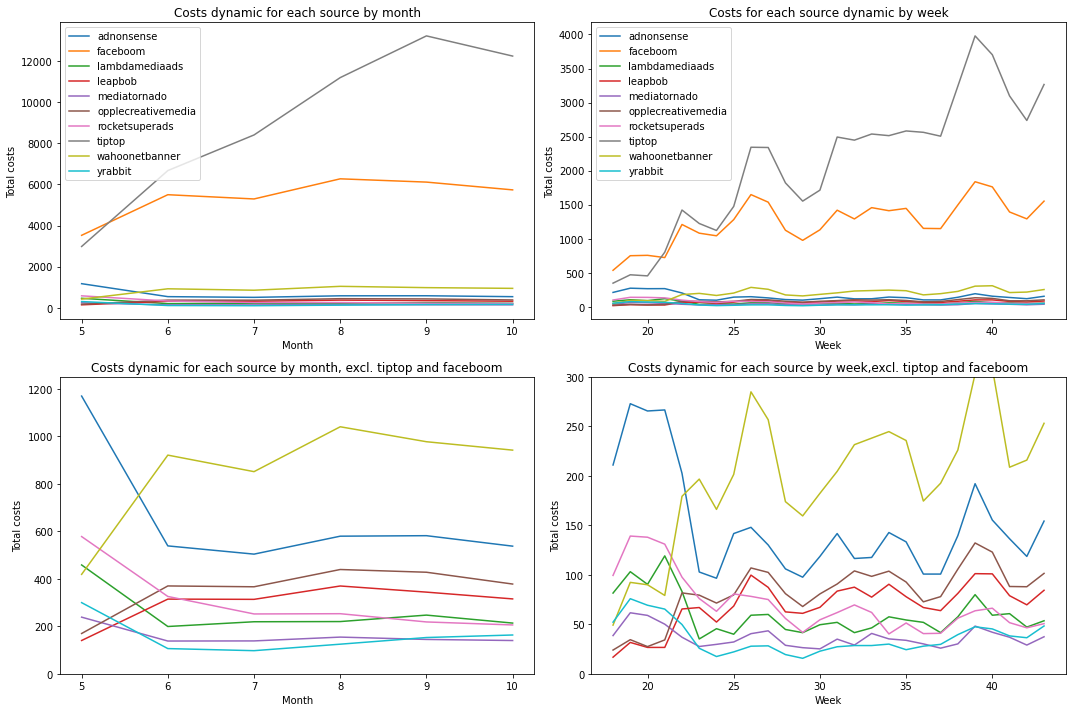

In [34]:
plt.figure(figsize = (15,10))

#1st plot
ax1 = plt.subplot(2,2,1)
costs_pivot = costs.pivot_table(index='dt_month', columns = 'channel', values = 'costs', aggfunc='sum')
costs_pivot.plot(grid=False, ax = ax1)
plt.legend()
plt.xlabel('Month')
plt.ylabel('Total costs')
plt.title('Costs dynamic for each source by month')


#2nd plot
ax2 = plt.subplot(2,2,2)
costs_pivot = costs.pivot_table(index='dt_week', columns = 'channel', values = 'costs', aggfunc='sum')
costs_pivot.plot(grid=False, ax = ax2)
plt.legend()
plt.xlabel('Week')
plt.ylabel('Total costs')
plt.title('Costs for each source dynamic by week')

#3rd plot - limit values on yaxis for more legible picture
ax3 = plt.subplot(2,2,3)
costs_pivot = costs.pivot_table(index='dt_month', columns = 'channel', values = 'costs', aggfunc='sum')
costs_pivot.plot(grid=False, ax = ax3)
plt.legend().remove()
plt.ylim(0,1250)
plt.xlabel('Month')
plt.ylabel('Total costs')
plt.title('Costs dynamic for each source by month, excl. tiptop and faceboom')


#4th plot - limit values on yaxis for more legible picture
ax4 = plt.subplot(2,2,4)
costs_pivot = costs.pivot_table(index='dt_week', columns = 'channel', values = 'costs', aggfunc='sum')
costs_pivot.plot(grid=False, ax = ax4)
plt.legend().remove()
plt.ylim(0,300)
plt.xlabel('Week')
plt.ylabel('Total costs')
plt.title('Costs dynamic for each source by week,excl. tiptop and faceboom')

plt.tight_layout()
plt.show()

 - sources `tiptop` и `faceboom` have highest marketing costs. Costs for these sources were changed gradually increased by week. Meanwhile costs of `tiptop` increased faster, than of `faceboom` - costs started be stable in last 2 months.
 - looking at limited data, we can mark `yrabbit`, `mediatornado` and `lambadamediaads` as least costed sources.

### 4.4 find out how much does it cost in average to acquire one user (CAC) from each source.

In [35]:
cac_per_channel = profiles.groupby('channel')['acquisition_cost'].agg('mean').sort_values(ascending = False)
cac_per_channel

channel
tiptop                2.799003
faceboom              1.113286
adnonsense            1.008054
lambdamediaads        0.724802
wahoonetbanner        0.602245
rocketsuperads        0.412095
opplecreativemedia    0.250000
yrabbit               0.218975
mediatornado          0.218717
leapbob               0.210172
organic               0.000000
Name: acquisition_cost, dtype: float64

In [36]:
profiles.query('channel != "organic"').acquisition_cost.mean()

1.127481323942928

We have calculated average values of acquiring 1 user for each source. Highest cost per user in `tiptop` and `faceboom` sources is 2.8 and 1.11, respectively. `Leapbob` has lowest cost per user - 0.21.

We also looked at average cost of acquiring 1 user from all sources at once,  excepted  organic (this is source without marketing costs). The indicator was 1.12, it again shows that majority of users came from `tiptop` and `faceboom` sources.

**Section summary:**
- total costs for marketing is around 106 M.
- most cost-generated sources - `tiptop` и `faceboom`, these sourcese 6 times higher in costs than other. Leastcost-generated source - `yrabbit`.  Sources `tiptop` и `faceboom` have highest marketing costs. Costs for these sources were changed gradually increased by week. Meanwhile costs of `tiptop` increased faster, than of `faceboom` - costs started be stable in last 2 months.
By limited data, we can mark `yrabbit`, `mediatornado` and `lambadamediaads` as least costed sources.
- average values of acquiring 1 user for each source. Highest cost per user in tiptop and faceboom sources is 2.8 and 1.11, respectively. Leapbob has lowest cost per user - 0.21.

## 5. ROI

Using LTV, ROI and CAC charts, analyze ROI. November 1, 2019 is on the calendar, and business plan was forecasted that users should pay off no later than two weeks after the acquisition. Organic users will be skiped from analysis.

- analyze ROI using LTV and ROI graphs, as well as graphs of LTV, CAC and ROI dynamics.
- check user conversion rate and their dynamics. Do same with user retention rate. Build and describe conversion and retention charts.
- analyze ROI by device. Plot LTV and ROI graphs, as well as graphs of LTV, CAC and ROI dynamics.
- analyze ROI by country. Plot LTV and ROI graphs, as well as graphs of LTV, CAC and ROI dynamics.
- analyze ROI by channels. Let's plot LTV and ROI graphs, as well as graphs of LTV, CAC and ROI dynamics.
- answer such questions:
    - Does advertising aimed be or positive ROI in acquiring users?
    - What devices, countries and  channels can have negative impact on ROI?
    - What could be a reason for problems of negative ROI?

**November 1, 2019 is on the calendar, and business plan was forecasted that users should pay off no later than two weeks after the acquisition. Organic users will be skiped from analysis.**

In [37]:
observation_date = datetime(2019, 11, 1).date()
horizon_days = 14
advert_profiles = profiles.query('channel != "organic"')

### 5.1 analyze ROI using LTV and ROI graphs, as well as graphs of LTV, CAC and ROI dynamics.

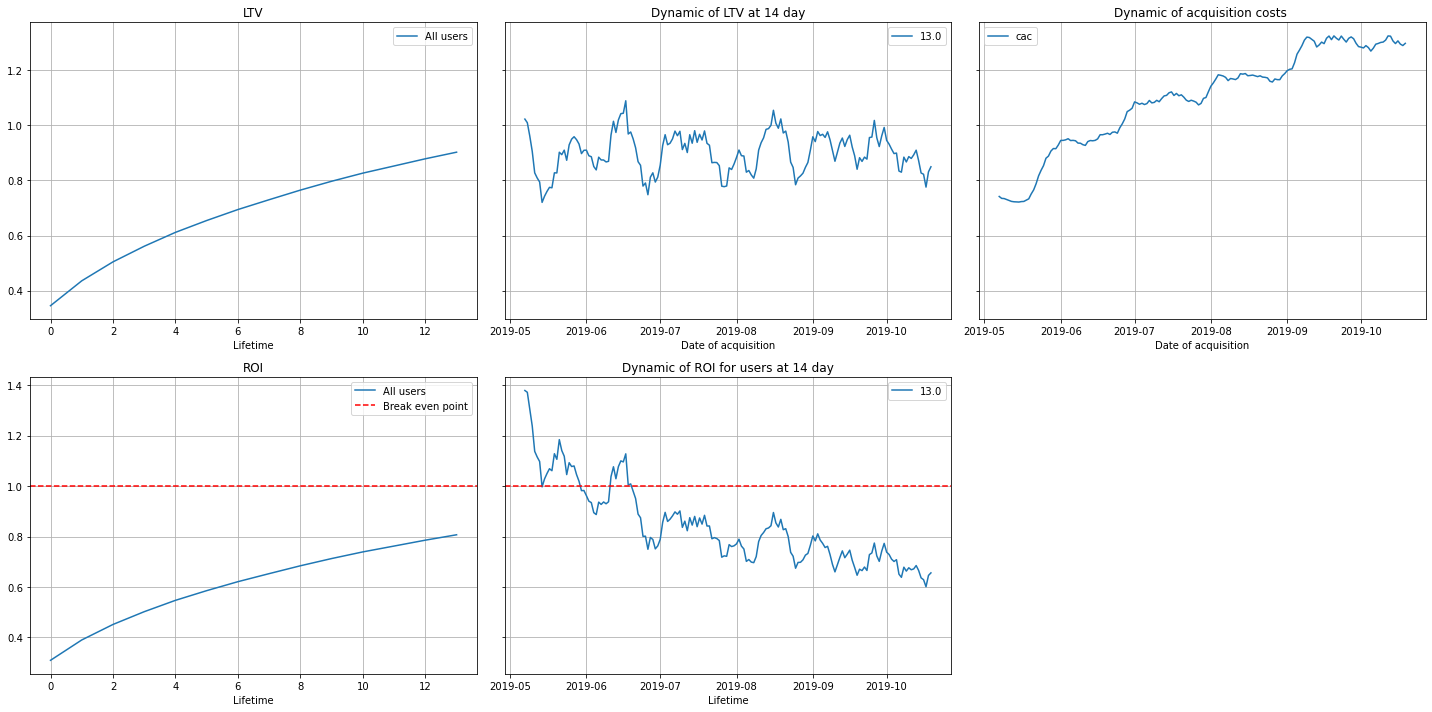

In [38]:
# calculate LTV and ROI
ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    advert_profiles, orders, observation_date, horizon_days
)
# plotting LTV and ROI
plot_ltv_roi(ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days) 

*We can make following conclusions:*
- Ads has negative ROIРеклама не окупается. ROI level at the aned of observed period - around 80% (plot ROI).
- LTV is stable. Guess changes doesnt connect to changes in customer behavior.
- CAC increased dramatically from 0.7 to 1.3. We can say that issue core is in increasing marketing costs.
- ROI dynamic during lifetime is negative. As LTV is stable during lifetime period, САС dynamic positive from May till October. This correlation connecnes to ROI dynamic - as САС sharply increased, equally ROI decreased.

### 5.2 check user conversion/retention rate and their dynamics.

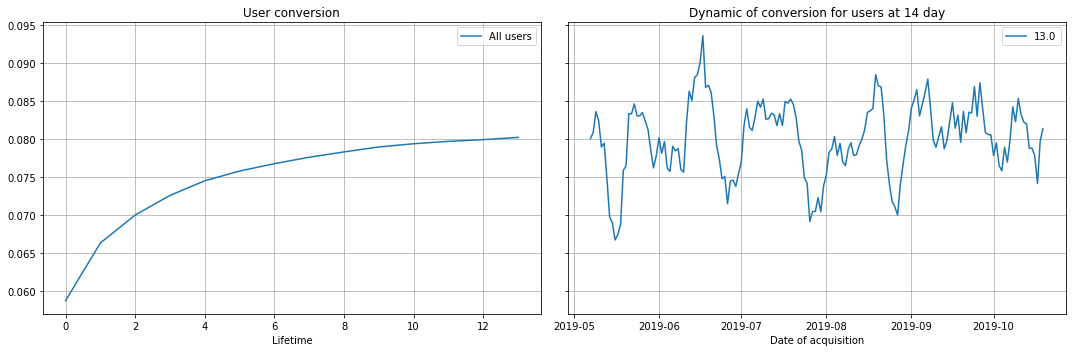

In [39]:
# using function get_conversion 
conversion_raw, conversion_grouped, conversion_history = get_conversion(
    advert_profiles, orders, observation_date, horizon_days
)
# plotting conversion rate
plot_conversion(conversion_grouped, conversion_history, horizon_days) 

Users are converting positively , with stable dynamic.

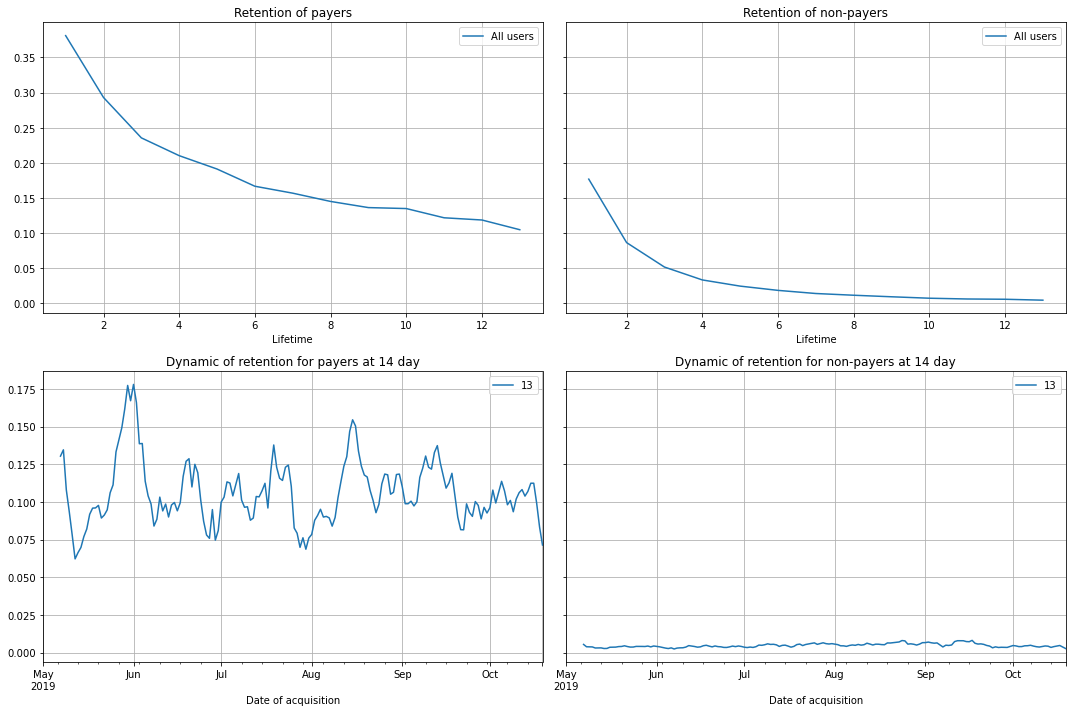

In [40]:
# using function get_retention to calculate retention rate
retention_raw, retention_grouped, retention_history = get_retention(
    advert_profiles, visits, observation_date, horizon_days
)
# visualizing
plot_retention(retention_grouped, retention_history, horizon_days) 

Plots show standard dynamics of user retention: retention decreases, while retention of paying users is higher than non-paying.
Retention and conversion look correct. Next, to analyze possible reasons, check characteristics of users — devices, country and source.

### 5.3 analyze ROI by device.

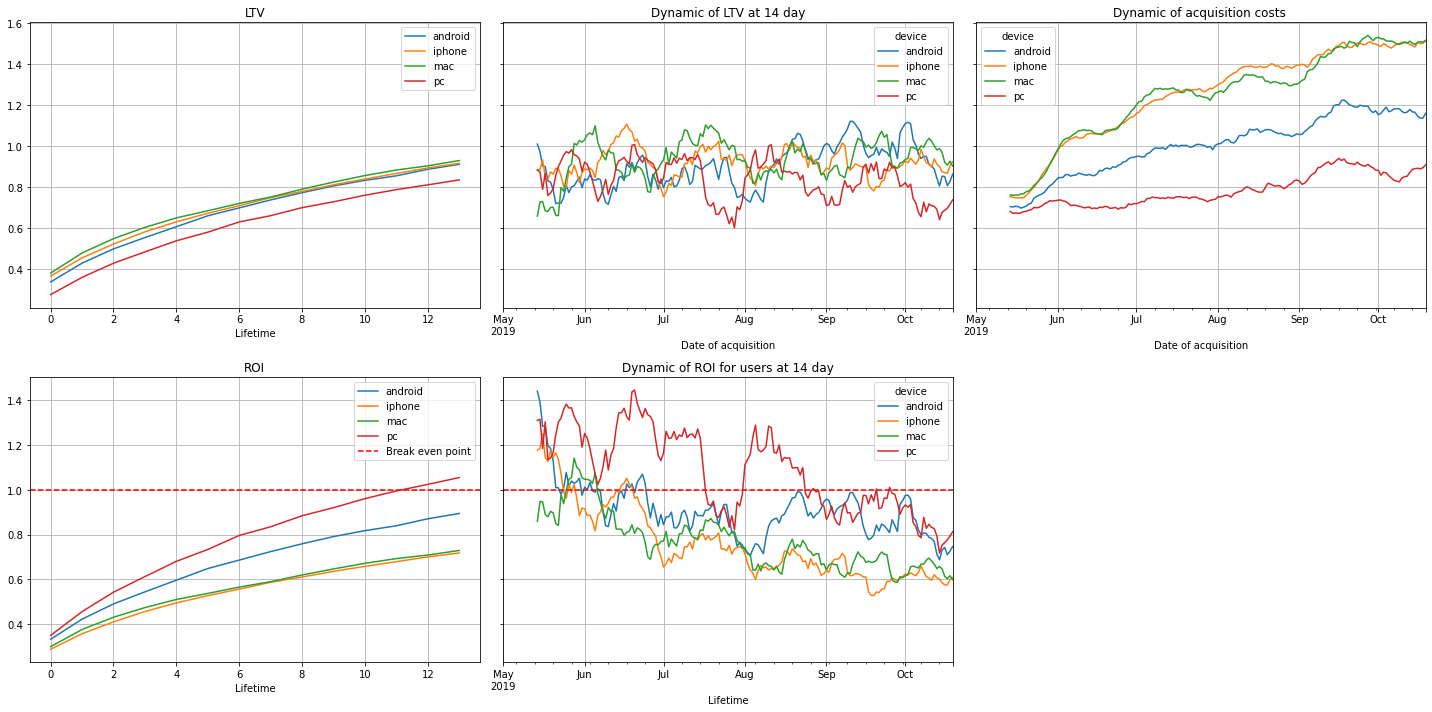

In [41]:
# ROI by device
dimensions = ['device']
#  LTV и ROI calculation
ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    advert_profiles, orders, observation_date, horizon_days, dimensions=dimensions
)
# visualizing
plot_ltv_roi(ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days, window=14) 

*We can make following conclusions:*
- ads ROI is negative in almost devices. Only `pc` ROI is positive at the enad of observed period. Due to min costs (CAC) in comparison to `mac` and `iphone`. 
- LTV by devices as well stable. Therefore, issue core is not in bad user quality by type of device.

### 5.4 analyze ROI by country.

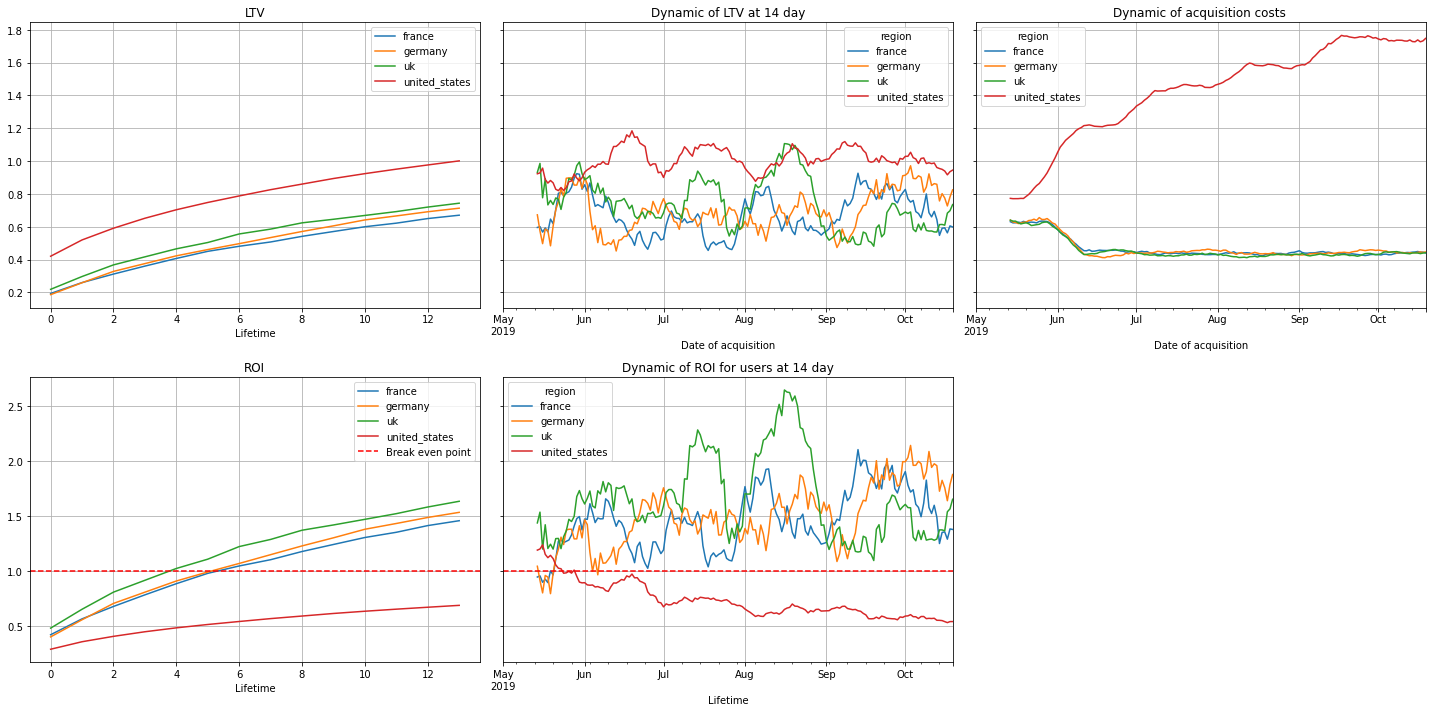

In [42]:
# ROI by country
dimensions = ['region']
# LTV и ROI calculation
ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    advert_profiles, orders, observation_date, horizon_days, dimensions=dimensions
)
# visualizing
plot_ltv_roi(ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days, window=14) 

Ads costs among US users increases from month to month and does not reach break even point in ROI. Since June 2019, adds costs have stopped growing for users in other countries and have positive ROI since 4th month.

### 5.5 analyze ROI by channels.

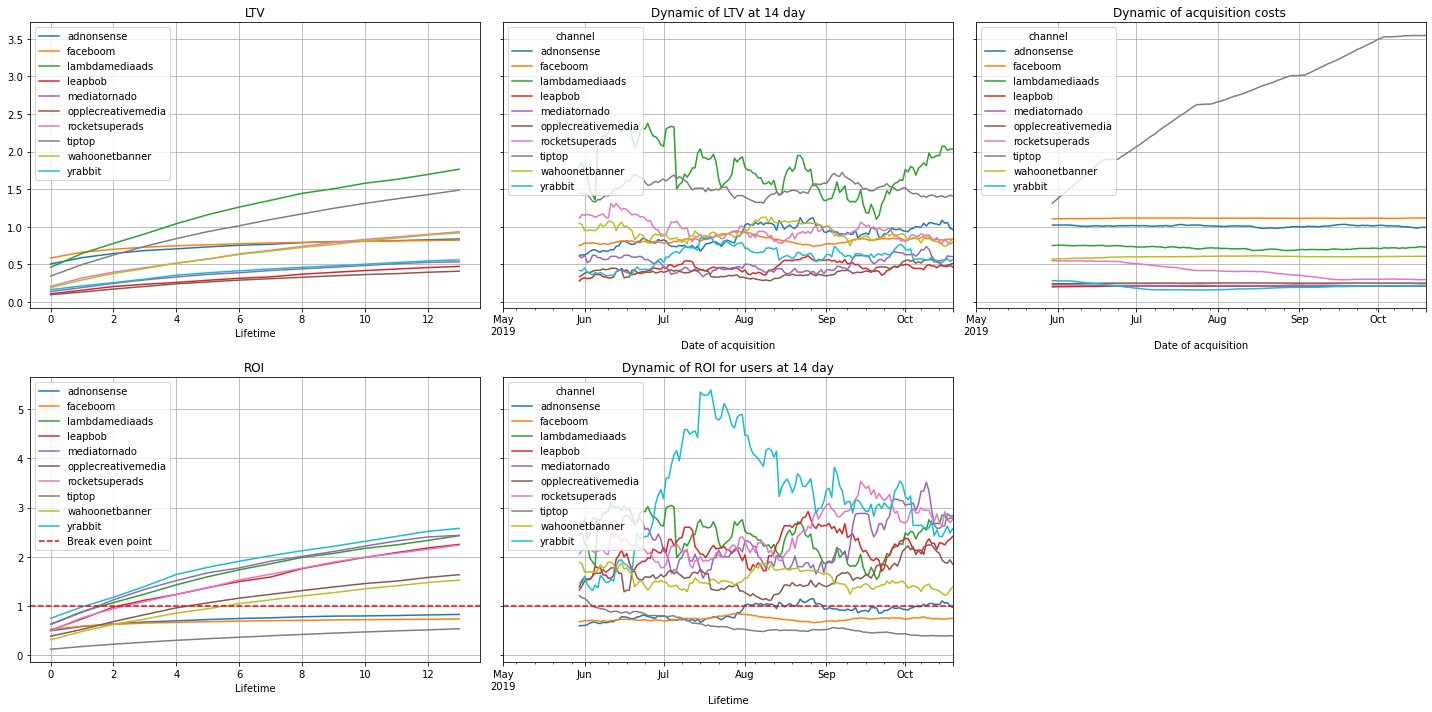

In [43]:
# ROI by channels
dimensions = ['channel']
#  LTV и ROI calculation
ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    advert_profiles, orders, observation_date, horizon_days, dimensions=dimensions
)
# visualizing
plot_ltv_roi(ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days, window=30) 

**We can make following conclusions:**
- 3 channels didnt reach positive ROI: `tiptop`, `faceboom` and `adnonsense`. Ads in other channels made positive ROI from 22-5 month, several channels show ROI in level more than 200%. 
- CAC for acquiring users from `tiptop` increased dramatically month by month. Other channels shows opposite situation - they are decreased their costs month by month . Guess a core issue is in `tiptop`.
- Highest level of revenue(LTV) shows `lambdamediaads`, but most effective channel from ROI prospective is `yrabbit`.

Also look at retention and conversion rate by device, region and channel.

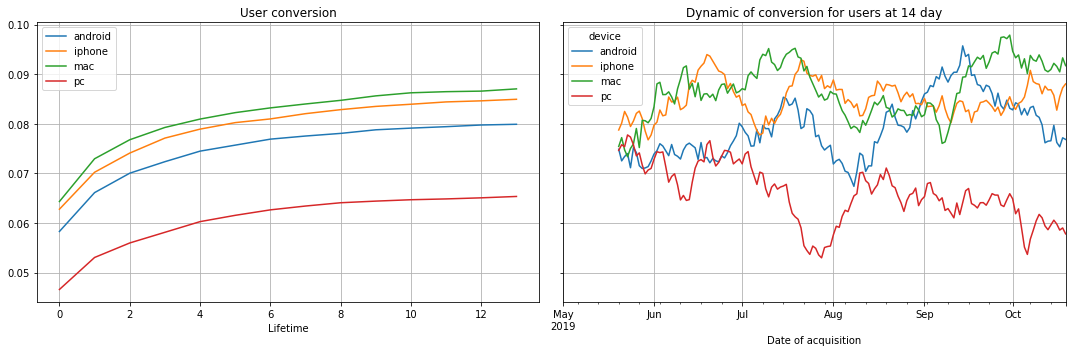

In [44]:
dimensions = ['device']
# conversion rate by device
conversion_raw, conversion_grouped, conversion_history = get_conversion(
    advert_profiles, orders, observation_date, horizon_days, dimensions = dimensions 
)
plot_conversion(conversion_grouped, conversion_history, horizon_days, window=20) 

Users of `mac` and `iphone` has healthy conversion rate. Least stable in conversion is `pc` user. Check retention rate

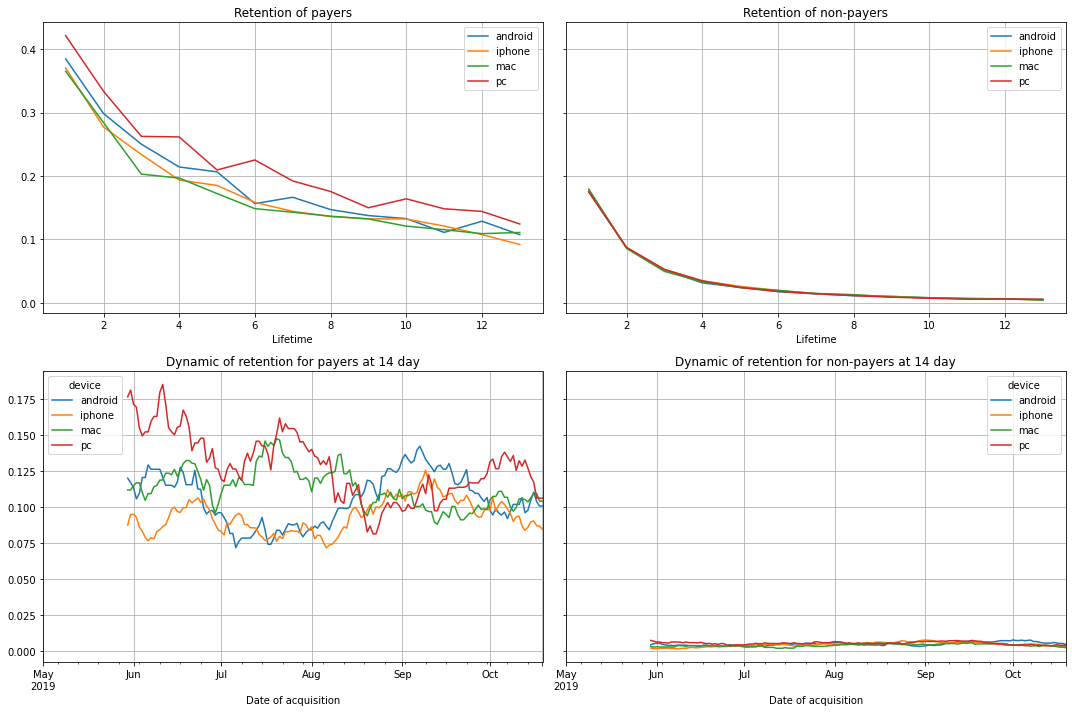

In [45]:
# retention rate by device

retention_raw, retention_grouped, retention_history = get_retention(
    advert_profiles, visits, observation_date, horizon_days, dimensions = dimensions
)

plot_retention(retention_grouped, retention_history, horizon_days, window=30) 

Users `mac` and `iphone` has lowest retantion rate. Guess this situation influence on ROI as well. 

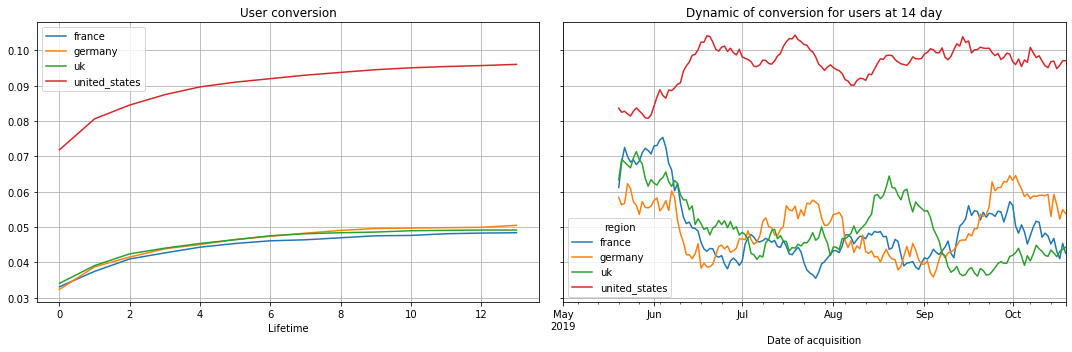

In [46]:
dimensions = ['region']
# conversion rate by region
conversion_raw, conversion_grouped, conversion_history = get_conversion(
    advert_profiles, orders, observation_date, horizon_days, dimensions = dimensions 
)
plot_conversion(conversion_grouped, conversion_history, horizon_days,window=20) 

USA has highest conversion rate and make 6 times difference to other.

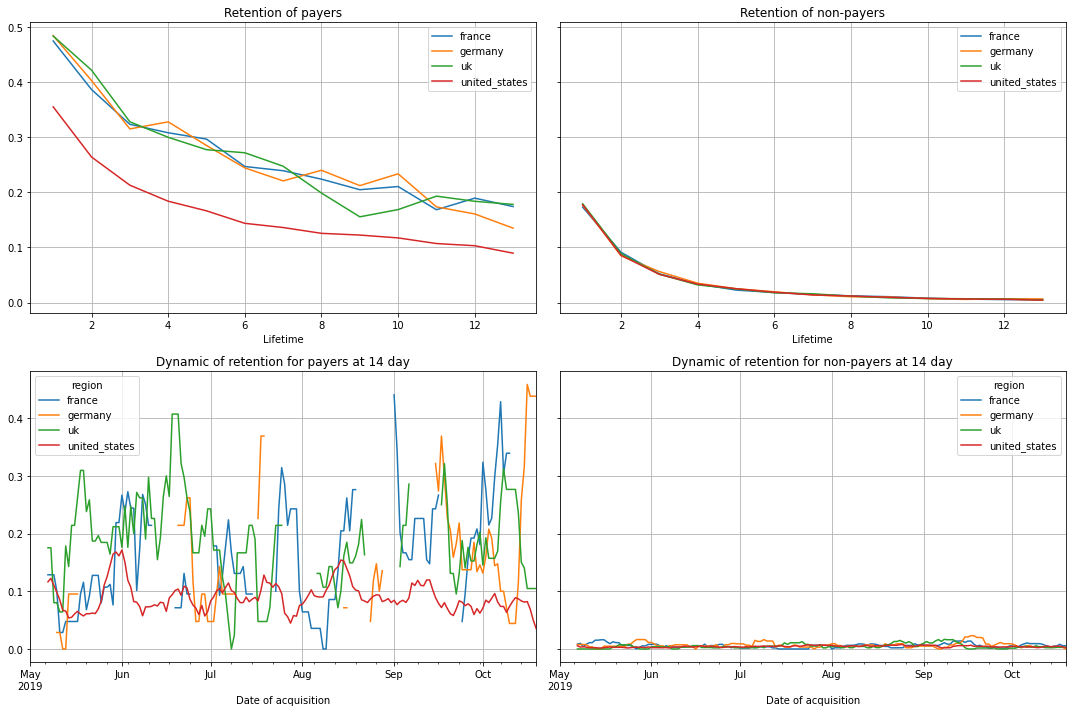

In [47]:
# retention rate by region

retention_raw, retention_grouped, retention_history = get_retention(
    advert_profiles, visits, observation_date, horizon_days, dimensions = dimensions
)

plot_retention(retention_grouped, retention_history, horizon_days)

USA users has highest conversion rate, but lowest retention rate. Take it into account for the following analysis

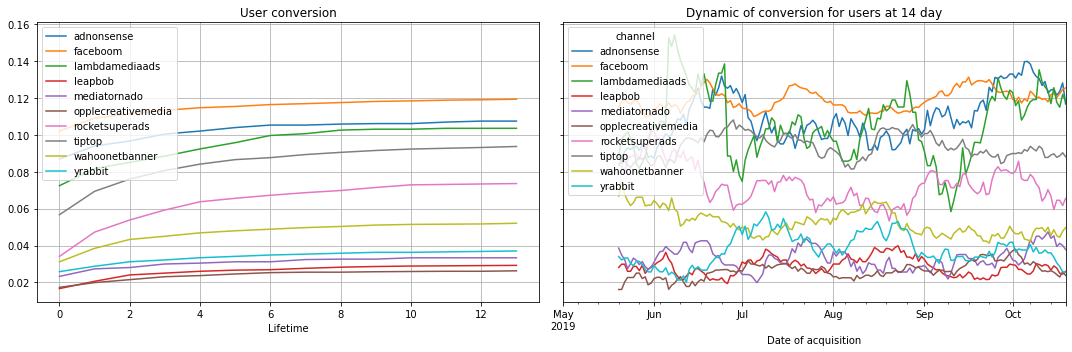

In [48]:
dimensions = ['channel']
# conversion rate by channel
conversion_raw, conversion_grouped, conversion_history = get_conversion(
    advert_profiles, orders, observation_date, horizon_days, dimensions = dimensions 
)
plot_conversion(conversion_grouped, conversion_history, horizon_days, window=20) 

Users came from `faceboom` and `adnonsense` highest conversion rate. Seems that low ROI level connect to low retention rate of these channels.

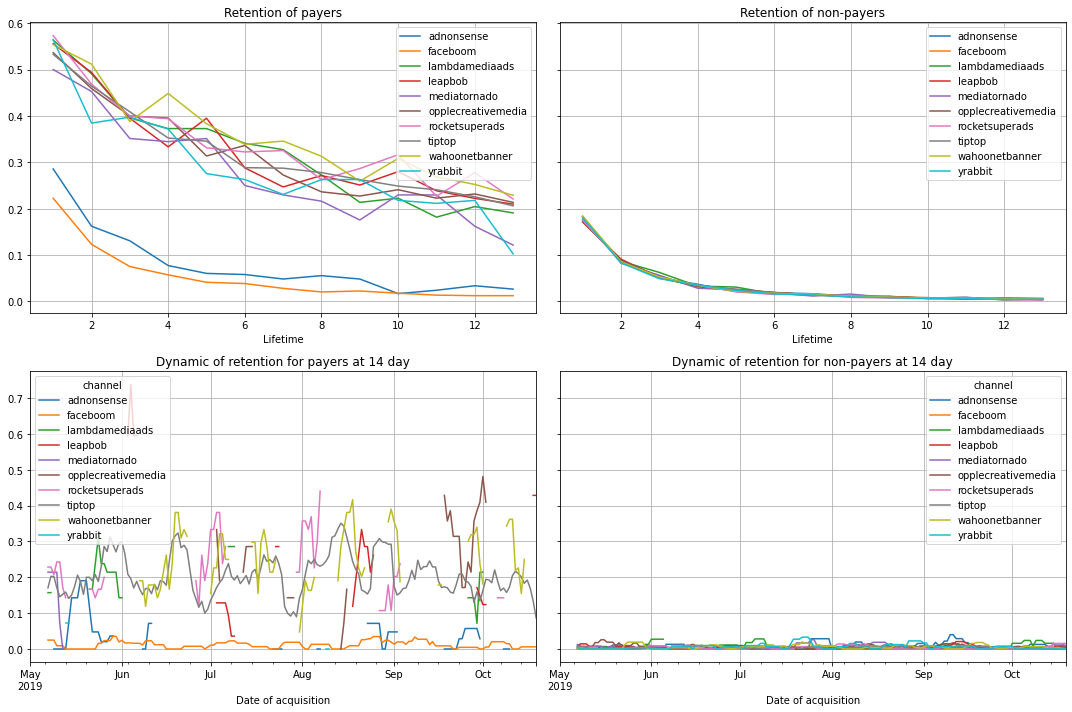

In [49]:
# retention by channel

retention_raw, retention_grouped, retention_history = get_retention(
    advert_profiles, visits, observation_date, horizon_days, dimensions = dimensions
)

plot_retention(retention_grouped, retention_history, horizon_days) 

Assumption was confirmed: users from `faceboom` and `adnonsense` have lowest retention rate.

After detailed analysis, look at short overview of ads costs and user qty by channels and regions

In [50]:
round(profiles.query('channel != "organic"').groupby(['channel','region'])[['acquisition_cost', 'user_id']].agg({'acquisition_cost': 'sum', 'user_id': 'nunique'}).sort_values(by='acquisition_cost',ascending = False),2)

acquisition_cost  user_id
channel            region                                  
tiptop             united_states          54751.30    19561
faceboom           united_states          32445.60    29144
rocketsuperads     united_states           1833.00     4448
wahoonetbanner     uk                      1808.89     3003
                   france                  1789.14     2971
                   germany                 1552.97     2579
adnonsense         france                  1376.32     1366
                   uk                      1305.65     1295
                   germany                 1229.28     1219
mediatornado       united_states            954.48     4364
yrabbit            united_states            944.22     4312
opplecreativemedia uk                       763.18     3052
                   france                   747.34     2991
                   germany                  640.73     2562
leapbob            uk                       639.61     3046
                   france                   628.05     2988
lambdamediaads     uk                       551.17      758
                   france                   535.14      742
leapbob            germany                  529.95     2519
lambdamediaads     germany                  471.29      649

After detailed analysis of ROI ads, retention and conversion rates, above dataframe once again confirms hypothesis that main issue is in : channel acquisition-region-device sequence. 
- `tiptop` and `faceboom` are most expensive ads in terms of cost, which are used only in the USA. Their costs are separated from all other channels by 50 and 30 times, respectively, and their ROI does not reach positive level. 
- `adnonsense` is another channel for acquaring users with negative ROI, which is used only in Europe. Compared to the United States, cost of ads for this channel is 30 times less in average .

*What are following conclusions:*
- obvious thing is to reduce cost for above channels. But this effect can help slightly, but doesnt solve ROI issue completely, since `tiptop`, `faceboom` and `adnonsense` have high potential due to highest conversion rate. So you need to look for reasons why users still went through these channels (converted), but did not stay for a long time.
- it is necessary to analyze operations of application on `mac` and `iphone` from a technical point of view - why users were practically not retained in the USA by switching to `tiptop` and `faceboom` and in Europe by switching to `adnonsense`. You can compare these channels with more successful ones - `yrabbit` in America, `lambdamediaads` in Europe.
- here you can see the multiplying effect of reducing ROI: 
  1. huge costs on ads in these channels in one region (spending on average exceeds spending on other channels by 35-40 times, while number of unique users in these channels is on average only 15-20 times higher than others). 
  2. Using channels for ads mainly on `iPhones` and `macs` (possible technical reasons related to these devices, for example, problems with the user's purchase followed by quick bounce due to error on the payment page or any other actions inside the application).

<div style="border:solid blue 3px; padding: 20px">

## Main summary

**Highlight reasons for inefficiency of users acquisition.**

We conducted exploratory analysis  user visits data, orders and ads costs in order to understand causes of the company's losses and help it gain a plus.
    
Having informed that users involved from May 1, 2019 to October 27, 2019, we note following observations: 
- most of the paying users comefrom United States who use the `iphone` and were acquired through ads source on `faceboom`. 
- most of the clients came naturally, and among them there was the smallest proportion of payers. 
- smallest share of paying users is in France, while in absolute terms - least paying users are in Germany. 
- main part of customers use the `iphone`, paying users also prefer it. At the same time, largest share of paying users is among `mac` owners, although in absolute number of paying, `mac` users is much lower in rate than the `iphone`. 
- smallest part of paying users are PC users. 
- most effective source of user acquiring on `faceboom`. `Faceboom` has largest share and  largest number of paying users. 
- according to absolute value of acquired paying users, ads on `mediatornado` turned out to be the worst. 
- `lambdamediaads` channel acquired least number of users, while share of paying users is more than 10% - recommend to marketing department considering increasing ads costs in this source.
- total amount of costs about 106 million.
- `tiptop` and `faceboom` are the most expensive ads sources, these sources are 6 times higher in costs than other channels. Smallest costs tis from `yrabbit`. Costs in `tiptop` grew fasterthan in `faceboom` -it became stable in last two months and stopped actively growing.
- average acquiring cost per one user for each source. Highest cost per user in `tiptop` and `faceboom` channels and, are 2.8 and 1.11, respectively. `Leapbob` has lowest cost per user - 0.21.

After detailed analysis of ROI, retention and conversion rate, confirm hypothesis that main issue are in: channel-region-device. 
- `tiptop` and `faceboom` are high-costed, which are used only in the USA. Their costs are different from all other channels by 50 and 30 times, respectively, and their ROI does not reach positive level. 
- `adnonsense` is another channel for aacquiring users with negative ROI, which is used only in Europe. Compared to the United States, costs of this channel is 30 times less than in average .


**Making recommendations for marketing department**

- obvious thing is to reduce cost for above channels. But this effect can help slightly, but doesnt solve ROI issue completely, since `tiptop`, `faceboom` and `adnonsense` have high potential due to highest conversion rate. So you need to look for reasons why users still went through these channels (converted), but did not stay for a long time.
- it is necessary to analyze operations of application on `mac` and `iphone` from a technical point of view - why users were practically not retained in the USA by switching to `tiptop` and `faceboom` and in Europe by switching to `adnonsense`. You can compare these channels with more successful ones - `yrabbit` in America, `lambdamediaads` in Europe.
- here you can see the multiplying effect of reducing ROI: 
  1. huge costs on ads in these channels in one region (spending on average exceeds spending on other channels by 35-40 times, while number of unique users in these channels is on average only 15-20 times higher than others). 
  2. Using channels for ads mainly on `iPhones` and `macs` (possible technical reasons related to these devices, for example, problems with the user's purchase followed by quick bounce due to error on the payment page or any other actions inside the application).